In [4]:
import tensorflow as tf
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


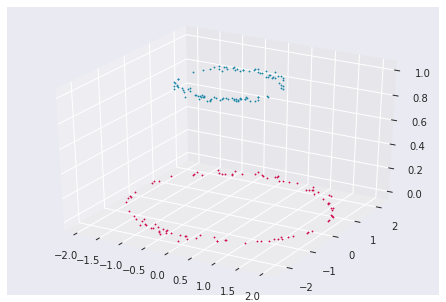

In [5]:
x1, x2, y = loadtxt("data.csv", delimiter=',', usecols=(0, 1, 2), unpack=True)
X = np.vstack((x1, x2))
X = X.astype(np.float32)
y_list = y
y = y.reshape(1, 200).astype(np.float32)
fig = figure()
ax1 = Axes3D(fig)
for n in range(200):
    if y_list[n] == 0.0:
        ax1.scatter(x1[n], x2[n], y_list[n], s = 2, c = '#D0104C')
    elif y_list[n] == 1.0:
        ax1.scatter(x1[n], x2[n], y_list[n], s = 2, c = '#1E88A8')

In [6]:
def generate_weight_and_bias(input_dim):
    # w, 1 x input_dim
    # 行向量，也可视为一维矩阵
    w = tf.Variable(tf.random_uniform([1, input_dim], -1, 1))
    # b, 1 * 1
    bias = tf.Variable(tf.zeros([1, 1]))
    return (w, bias)

In [7]:
def accuracy(preds, labels):
    return ((preds > 0.5) == labels).sum() / float(len(labels))

In [8]:
tf.reset_default_graph()
W1, b1 = generate_weight_and_bias(2)
X_ph = tf.placeholder('float')
h1_input = tf.add(tf.matmul(W1, X_ph), b1)
h1_output = tf.tanh(h1_input) 

W2, b2 = generate_weight_and_bias(2)
h2_input = tf.add(tf.matmul(W2, X_ph), b2)
h2_output = tf.tanh(h2_input) 

W_h, b_h = generate_weight_and_bias(2)
H = tf.concat([h1_output, h2_output], 0)
nn_raw_output = tf.add(tf.matmul(W_h, H), b_h)
final_output = tf.sigmoid(nn_raw_output)

In [9]:
cost = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(logits=nn_raw_output, labels=y)
)

In [10]:
x1_axis = np.linspace(-3, 3, 256)
x1_axis, x2_axis = np.meshgrid(x1_axis, x1_axis)
X_axis = np.c_[x1_axis.ravel(), x2_axis.ravel()].T.astype(np.float32)

0.54
0.605
0.865
0.885
0.885
0.885


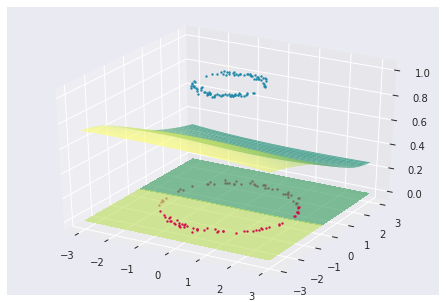

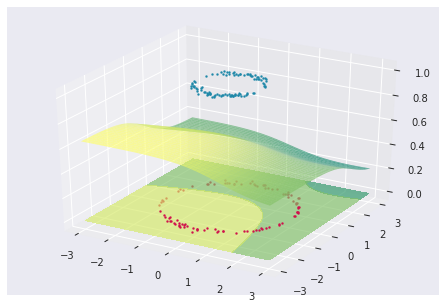

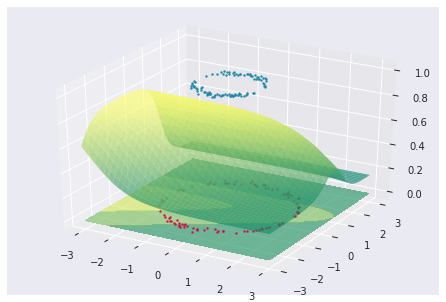

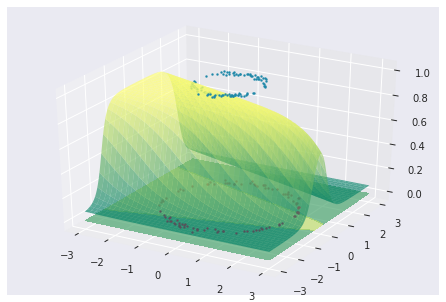

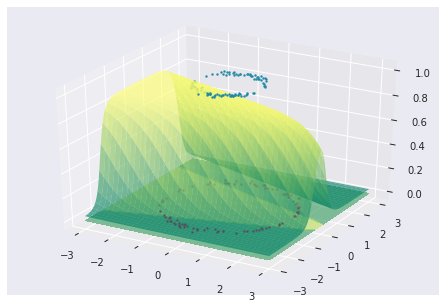

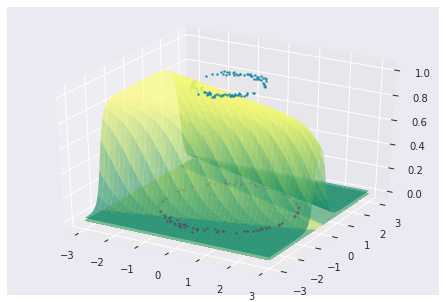

In [19]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
with tf.Session() as sess:
    feed_dict = {X_ph:X}
    sess.run(tf.global_variables_initializer())
    for i in range(3000):
        sess.run(train_step, feed_dict = feed_dict)
        if i % 500 == 0:
            preds = sess.run(final_output, feed_dict = feed_dict)
            print accuracy(preds, y_list)
            Z_axis = sess.run(final_output, {X_ph:X_axis})
            fig = figure()
            ax2 = Axes3D(fig)
            ax2.plot_surface(x1_axis, x2_axis, Z_axis.reshape(x1_axis.shape), alpha=.65, cmap='summer')
            ax2.contourf(x1_axis, x2_axis, Z_axis.reshape(x1_axis.shape), 1, alpha=.65, zdir='z', offset=0, cmap='summer')
            for n in range(200):
                if y_list[n] == 0.0:
                    ax2.scatter(x1[n], x2[n], y_list[n], s = 4, c = '#D0104C')
                elif y_list[n] == 1.0:
                    ax2.scatter(x1[n], x2[n], y_list[n], s = 4, c = '#1E88A8')